<a href="https://colab.research.google.com/github/sohamgeek/expt-python-for-data-science-skill-sem-4-/blob/main/skill_expt_9_and_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#expt 9
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset (Wine Quality from UCI ML Repository)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=';')

# Split into features and target
X = data.drop(columns=['quality'])  # Features
y = data['quality']  # Target

# Normalize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 1️⃣ Apply Recursive Feature Elimination (RFE)
model = LogisticRegression(max_iter=1000)

# Select top 5 features
rfe = RFE(model, n_features_to_select=5)
X_rfe = rfe.fit_transform(X_train, y_train)

# Get selected feature names
selected_features_rfe = X.columns[rfe.get_support()]
print("\n✅ Selected Features using RFE (Recursive Feature Elimination):", list(selected_features_rfe))



✅ Selected Features using RFE (Recursive Feature Elimination): ['volatile acidity', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']


In [8]:
#expt 10
# Install mlxtend for feature selection
!pip install mlxtend

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Load dataset (Wine Quality from UCI ML Repository)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=';')

# Split into features and target
X = data.drop(columns=['quality'])  # Features
y = data['quality']  # Target

# Normalize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define Logistic Regression model
model = LogisticRegression(max_iter=1000)

# 1️⃣ Apply **Forward Feature Selection**
sfs_forward = SFS(model,
                   k_features=5,  # Select top 5 features
                   forward=True,  # Forward selection
                   floating=False,
                   scoring='accuracy',
                   cv=5)  # 5-fold cross-validation

sfs_forward.fit(X_train, y_train)

# Get selected feature names for Forward Selection
selected_features_forward = list(X.columns[list(sfs_forward.k_feature_idx_)])
print("\n✅ Selected Features using Forward Selection:", selected_features_forward)

# 2️⃣ Apply **Backward Feature Selection**
sfs_backward = SFS(model,
                    k_features=5,  # Select top 5 features
                    forward=False,  # Backward selection
                    floating=False,
                    scoring='accuracy',
                    cv=5)  # 5-fold cross-validation

sfs_backward.fit(X_train, y_train)

# Get selected feature names for Backward Selection
selected_features_backward = list(X.columns[list(sfs_backward.k_feature_idx_)])
print("\n✅ Selected Features using Backward Selection:", selected_features_backward)



✅ Selected Features using Forward Selection: ['volatile acidity', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']

✅ Selected Features using Backward Selection: ['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']


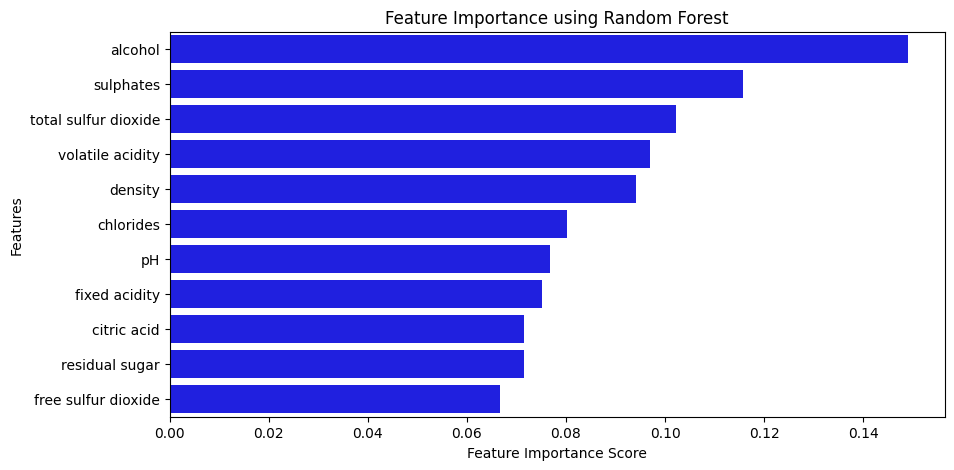

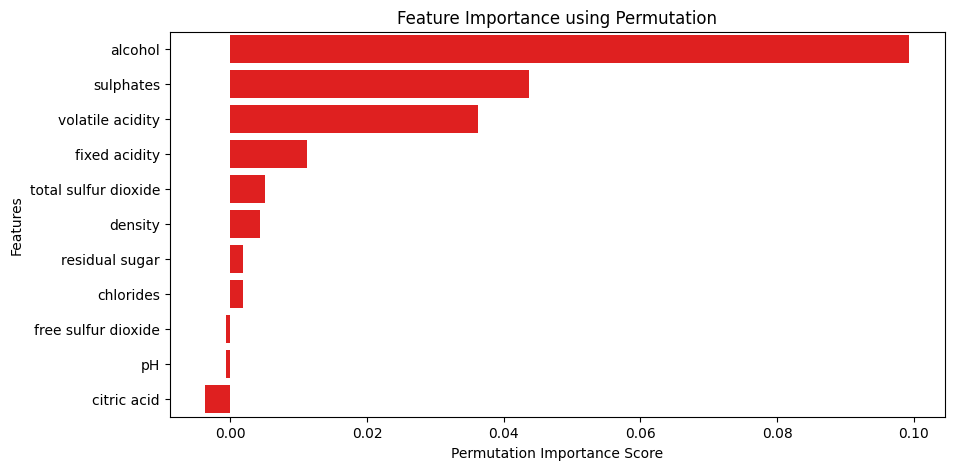

In [11]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset (Wine Quality from UCI ML Repository)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=';')

# Split into features and target
X = data.drop(columns=['quality'])  # Features
y = data['quality']  # Target

# Normalize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 1️⃣ Feature Importance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance scores
feature_importance_rf = pd.Series(rf.feature_importances_, index=data.columns[:-1]).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance_rf, y=feature_importance_rf.index, color="blue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance using Random Forest")
plt.show()

# 2️⃣ Feature Importance using Permutation Method
perm_importance = permutation_importance(rf, X_test, y_test, scoring='accuracy')

# Convert results to a Pandas Series
feature_importance_perm = pd.Series(perm_importance.importances_mean, index=data.columns[:-1]).sort_values(ascending=False)

# Plot Permutation Importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance_perm, y=feature_importance_perm.index, color="red")
plt.xlabel("Permutation Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance using Permutation")
plt.show()
